In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [28]:
print(np.linspace(-3.5, 3.5, 2, endpoint=True))

[-3.5  3.5]


In [15]:
seed = 0
plot = True

rng = np.random.RandomState(seed)

innerstepsize = 0.02 # stepsize in inner SGD for reptile

innerepochs = 1 # number of epochs of each inner SGD

outerstepsize0 = 0.1 # stepsize of outer optimization, i.e., meta-optimization

niterations = 20000 # number of outer updates; each iteration we sample one task and update on it

epochs = 10 # number of epochs

# Define task distribution
x_all = np.linspace(-5, 5, 50)[:,None] # All of the x points
ntrain = 10 # Size of training minibatches (K)

In [16]:
def gen_task():
    phase = rng.uniform(low=0, high=2*np.pi)
    ampl = rng.uniform(0.1, 5)
    f_randomsine = lambda x : np.sin(x + phase) * ampl
    return f_randomsine

In [17]:
num_hidden = 64
num_classes = 1
num_feature = 1

In [18]:
# Choose a fixed task and minibatch for visualization
f_plot = gen_task()
xtrain_plot = x_all[rng.choice(len(x_all), size=ntrain)]

# **Transfer Learning**

In [22]:
def to_tensor(x):
    return tf.convert_to_tensor(x, dtype=tf.float32)

def train_on_batch(x, y, model, optimizer):
    x = to_tensor(x)
    y = to_tensor(y)

    with tf.GradientTape() as tape:
        YHat = model(x)
        loss = mse_loss_fn(y, YHat)
        grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss

def predict(x, model):
    x = to_tensor(x)
    return model(x).numpy()

In [25]:
class Model(tf.keras.layers.Layer):

    def __init__(self):
        super(Model, self).__init__()

        self.dense_1 = tf.keras.layers.Dense(num_hidden, activation='relu')
        self.dense_2 = tf.keras.layers.Dense(num_hidden, activation='relu')
        self.dense_3 = tf.keras.layers.Dense(num_classes, activation='linear')

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return x

mlp = Model()

# Necessary to create the model's state.
# The model doesn't have a state until it's called at least once.
_ = mlp(tf.zeros((1, 1)))

mse_loss_fn = tf.keras.losses.MeanSquaredError()

4.815770247960383


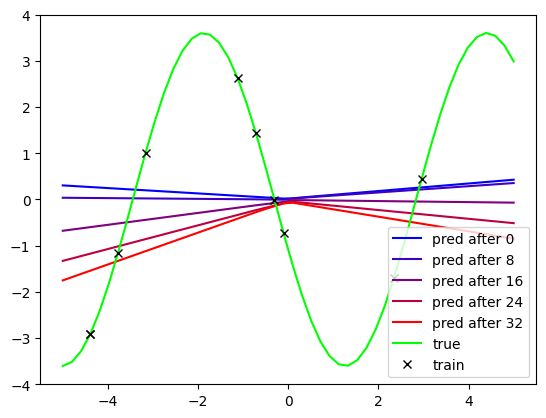

-----------------------------
iteration               1
loss on plotted curve   7.759
7.173056412148818
6.844699802177189
9.157426896071852
4.875365515535409
11.33688240416564
0.9500670648749682
0.18709520386857784
8.7211609379979
6.17387038275474
1.8807881903985364
3.2665565293950425
0.3460353754301271
8.619404398289193
0.7126863290460507
11.127658713389208
0.1684133481743178
0.647888384912737
4.995584436349896
1.0180461470040907
1.1709605920738446
2.000408606132395
3.141259869720677
2.881044026397295
0.01329361261913518
6.209143454383027
10.596589130360474
1.0189652169143357
2.261014214497479
5.3398739414951795
5.62836584059927
0.7716150785228152
10.257652802003959
7.907258311048739
2.830057877349235
2.499654702235056
6.5894965917431625
0.10013367162655812
10.56748211899694
10.311481240193475
7.117511575131915
1.9121691519109247
4.378783514947793
0.06484784278907689
11.471189362938766
0.2522247078897417
5.2233220319160925
1.5411593361108666
0.07608764983202772
2.722083213663825
7.814

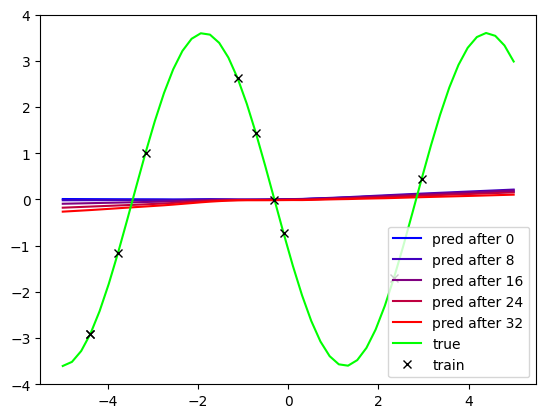

-----------------------------
iteration               1000
loss on plotted curve   6.707
7.5371333686667406
0.24471289192281329
0.3016747865764834
6.6711470095943275
1.01106871420534
3.2067454197242404
12.107290121757321
0.02055578919605664
3.9169376248875416
1.7528616549872276
5.224976034661131
2.962245612103698
1.2192010730773708
9.780493755851362
5.842292942537918
9.871912870010618
2.701097903701185
2.2820599777534856
5.0274522223387175
8.883092311514211
1.805028995111515
0.17319484055229406
8.085165907381322
0.0051153715992970005
0.05239942412317914
0.5198448867995615
2.199481886758241
2.2226863557252603
6.8180006109828355
0.16181114674484032
1.5837804849805122
5.421602750009103
3.9551100543156537
1.3732813628168636
0.6465174365037545
0.3118304313800888
1.841645147461544
3.2634934305388312
1.5426383663923797
2.01294069091737
13.10943235365957
0.010934580206043234
1.7116526610414993
1.9534253501995118
3.052782377770674
0.5955520528939767
4.918607399559632
11.818549539780612
2.573799

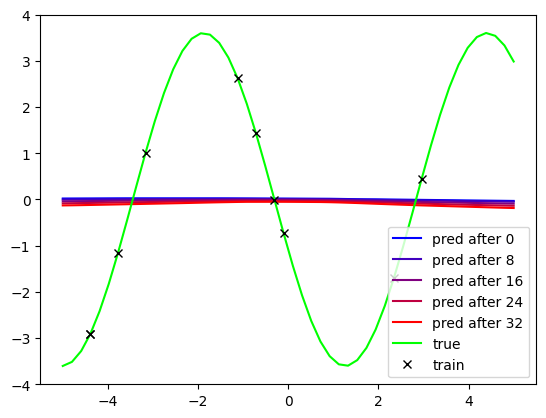

-----------------------------
iteration               2000
loss on plotted curve   6.967
7.92129749770185
12.97511105227975
12.401185434589587
1.0463412069358595
2.481867628715945
0.008875063970261582
0.018330227223120554
0.016522829652119684
1.8323977232325959
9.186608982203937
7.4273925630025746
0.20412197470978946
2.068339871012787
2.05924020842269
0.029796063128446574
0.15958949260591904
2.2018869389024815
3.136877985532428
3.3665956903894623
10.377657715076412
0.4965327651198067
5.4056967237297
2.190643049218836
8.944369266933457
2.50134780530102
10.84897301586517
0.08140030029530226
3.3320943721277443
5.939718044038261
4.059034397921097
0.2232442072805791
3.309323805720144
10.186214306469692
5.238875129384848
11.865926741367993
2.8300892985536104
5.52307398564303
3.034650143026447
1.7316708666645075
10.149090041069256
10.907790622195666
5.3206141063953325
4.597292583987302
5.696329871326412
0.6311157137860071
1.7939313135661152
3.115079761509372
1.0050964079397042
0.1287550387386

KeyboardInterrupt: 

In [26]:
# transfer learning

for iteration in range(niterations):

    optimizer = tf.keras.optimizers.Adam()

    # generate task
    f = gen_task()
    y_all = f(x_all)

    inds = rng.permutation(len(x_all))

    # for some k number of iterations perform optimization on the task
    for k in range(innerepochs):

        for start in range(0, len(x_all), ntrain):
            mbinds = inds[start:start+ntrain]
            train_on_batch(x_all[mbinds], y_all[mbinds], mlp, optimizer)

    # begin evaluation
    if plot and iteration==0 or (iteration+1) % 1000 == 0:

        plt.cla()
        f = f_plot

        weights_before = mlp.get_weights()

        plt.plot(x_all, predict(x_all, mlp), label="pred after 0", color=(0,0,1))

        for inneriter in range(32):

            train_on_batch(xtrain_plot, f(xtrain_plot), mlp, optimizer)

            if (inneriter+1) % 8 == 0:
                frac = (inneriter+1) / 32
                plt.plot(x_all, predict(x_all, mlp), label="pred after %i"%(inneriter+1), color=(frac, 0, 1-frac))

        plt.plot(x_all, f(x_all), label="true", color=(0,1,0))
        lossval = np.square(predict(x_all, mlp) - f(x_all)).mean()
        plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
        plt.ylim(-4,4)
        plt.legend(loc="lower right")
        plt.pause(0.01)

        mlp.set_weights(weights_before)

        print("-----------------------------")
        print("iteration               {}".format(iteration+1))
        print("loss on plotted curve   {:.3f}".format(lossval))

# **Reptile**

In [19]:
def to_tensor(x):
    return tf.convert_to_tensor(x, dtype=tf.float32)

def train_on_batch(x, y, model, optimizer):
    x = to_tensor(x)
    y = to_tensor(y)

    with tf.GradientTape() as tape:
        YHat = model(x)
        loss = mse_loss_fn(y, YHat)
        grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss

def predict(x, model):
    x = to_tensor(x)
    return model(x).numpy()

In [20]:
class Model(tf.keras.layers.Layer):

    def __init__(self):
        super(Model, self).__init__()

        self.layer_1 = tf.keras.layers.Dense(num_hidden, activation='relu')
        self.layer_2 = tf.keras.layers.Dense(num_hidden, activation='relu')
        self.layer_3 = tf.keras.layers.Dense(num_classes, activation='linear')

    def call(self, inputs):
        x = self.layer_1(inputs)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x

mlp = Model()

# Necessary to create the model's state.
# The model doesn't have a state until it's called at least once.
_ = mlp(tf.zeros((1, 1)))

optimizer = tf.keras.optimizers.SGD(learning_rate=innerstepsize)
mse_loss_fn = tf.keras.losses.MeanSquaredError()

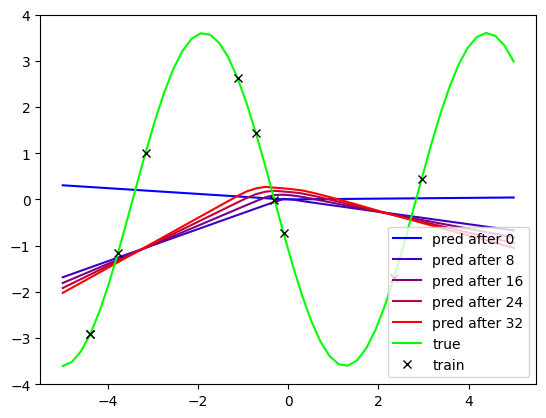

-----------------------------
iteration               1
loss on plotted curve   7.601


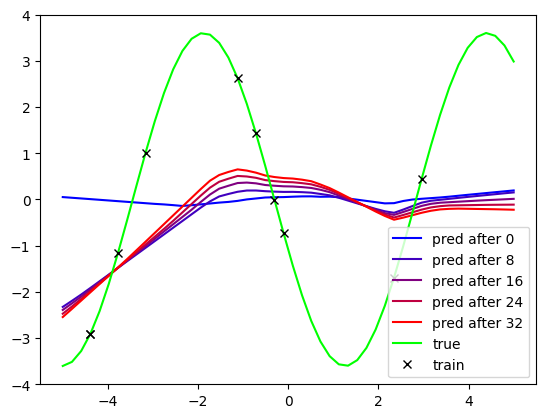

-----------------------------
iteration               1000
loss on plotted curve   6.147


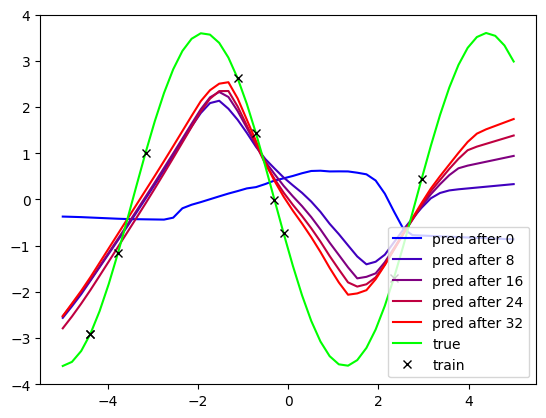

-----------------------------
iteration               2000
loss on plotted curve   1.659


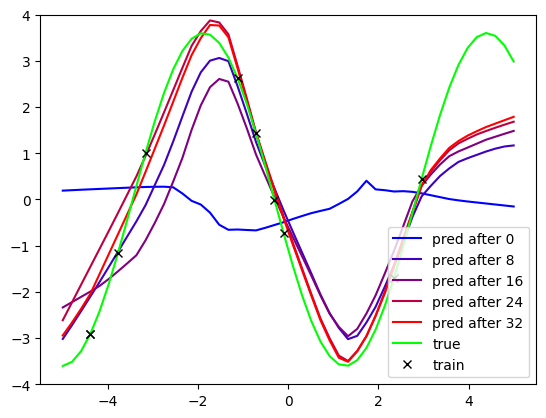

-----------------------------
iteration               3000
loss on plotted curve   0.665


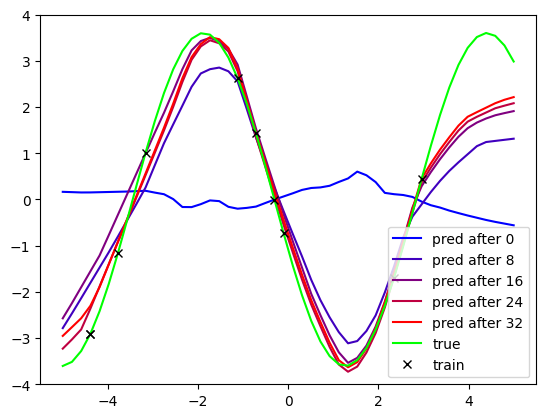

-----------------------------
iteration               4000
loss on plotted curve   0.419


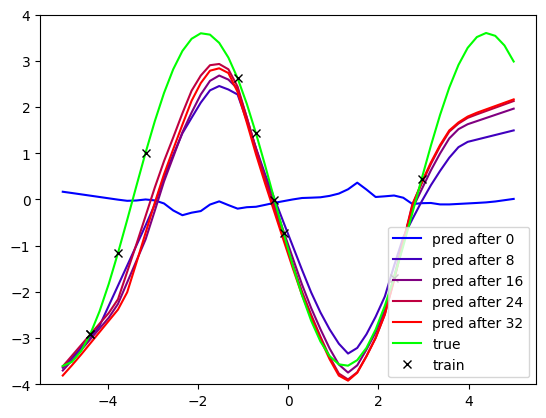

-----------------------------
iteration               5000
loss on plotted curve   0.852


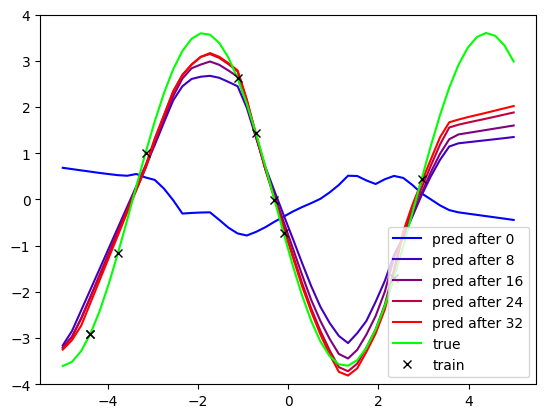

-----------------------------
iteration               6000
loss on plotted curve   0.402


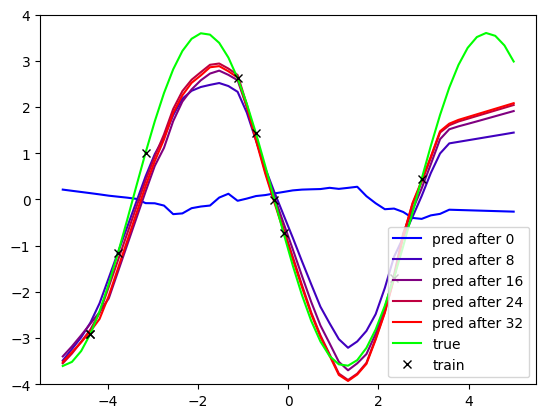

-----------------------------
iteration               7000
loss on plotted curve   0.467


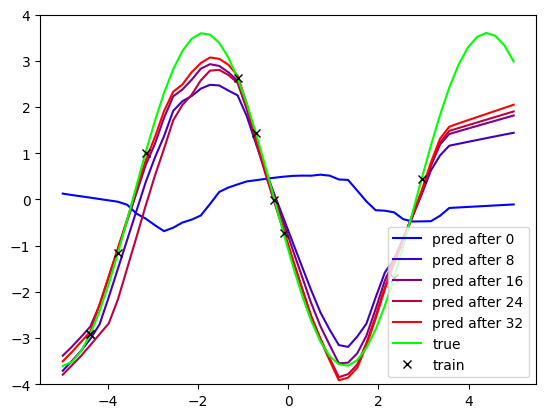

-----------------------------
iteration               8000
loss on plotted curve   0.397


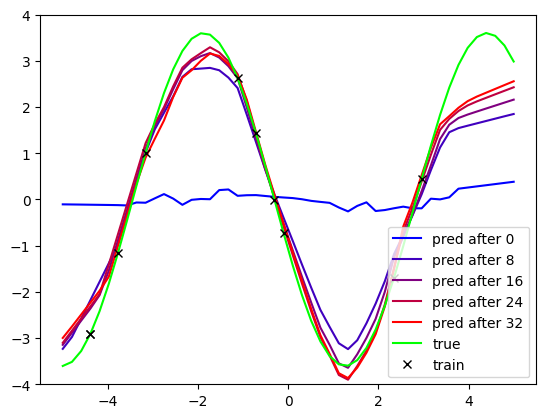

-----------------------------
iteration               9000
loss on plotted curve   0.270


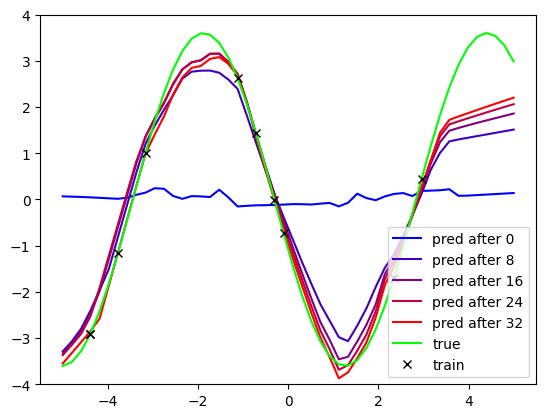

-----------------------------
iteration               10000
loss on plotted curve   0.324


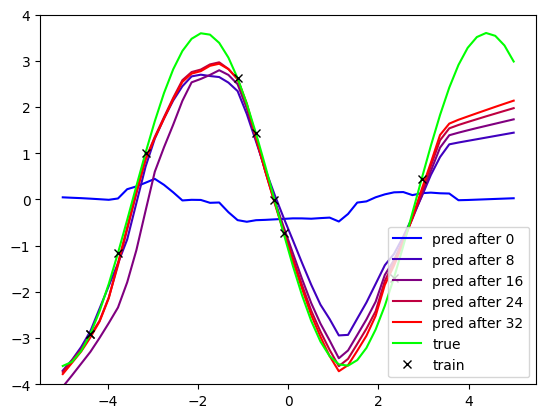

-----------------------------
iteration               11000
loss on plotted curve   0.378


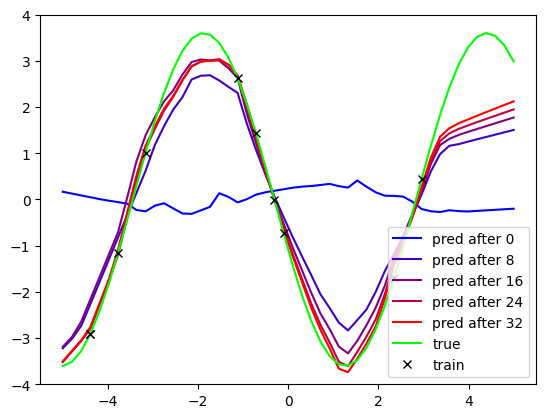

-----------------------------
iteration               12000
loss on plotted curve   0.373


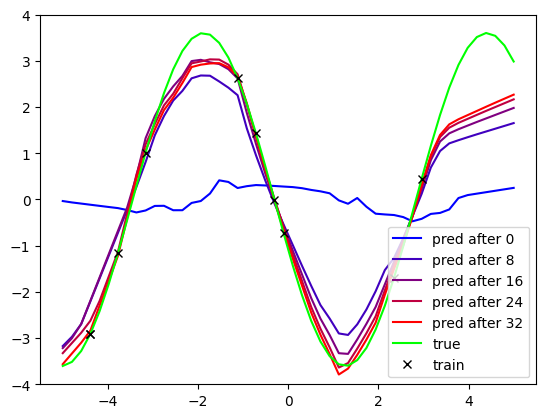

-----------------------------
iteration               13000
loss on plotted curve   0.328


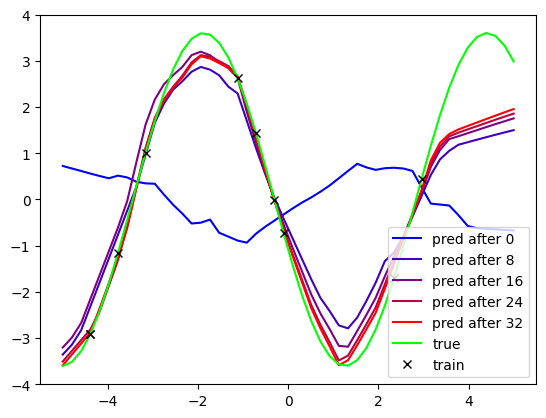

-----------------------------
iteration               14000
loss on plotted curve   0.441


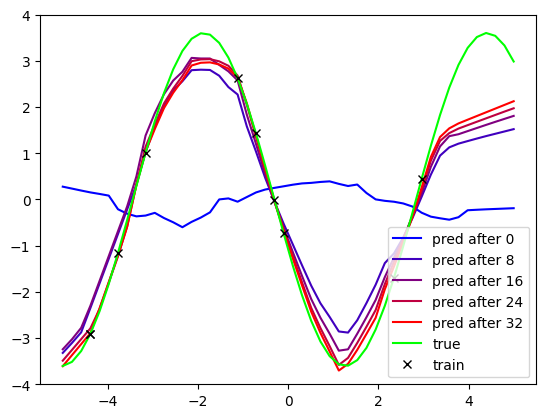

-----------------------------
iteration               15000
loss on plotted curve   0.374


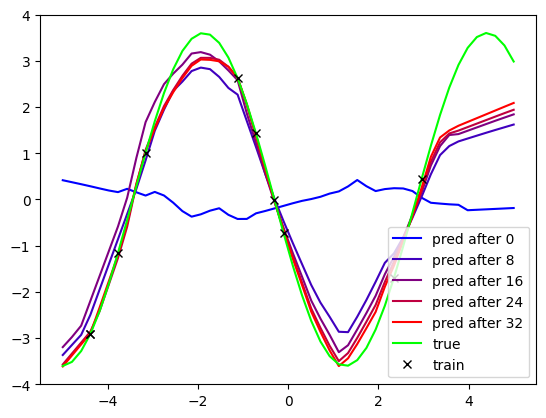

-----------------------------
iteration               16000
loss on plotted curve   0.394


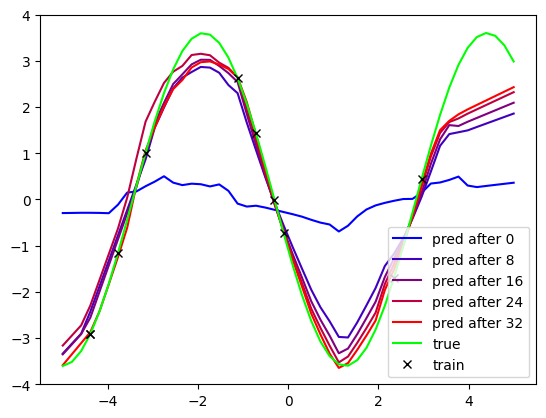

-----------------------------
iteration               17000
loss on plotted curve   0.270


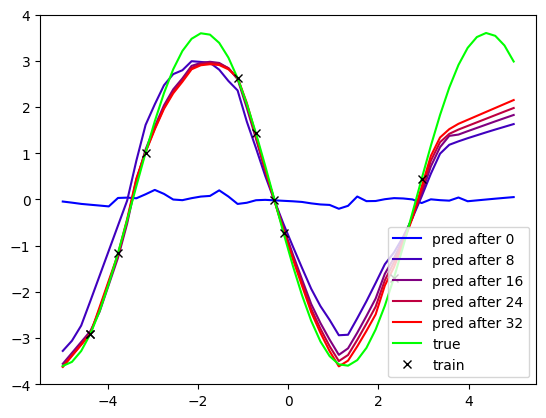

-----------------------------
iteration               18000
loss on plotted curve   0.381


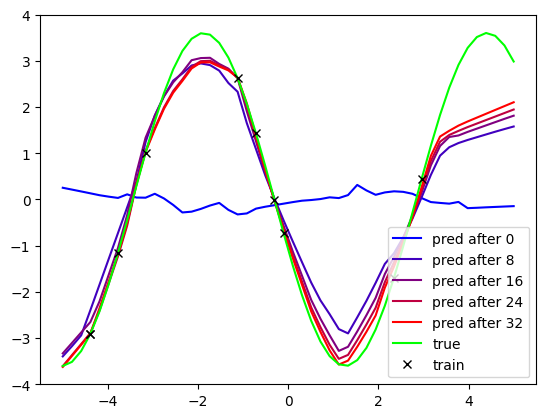

-----------------------------
iteration               19000
loss on plotted curve   0.394


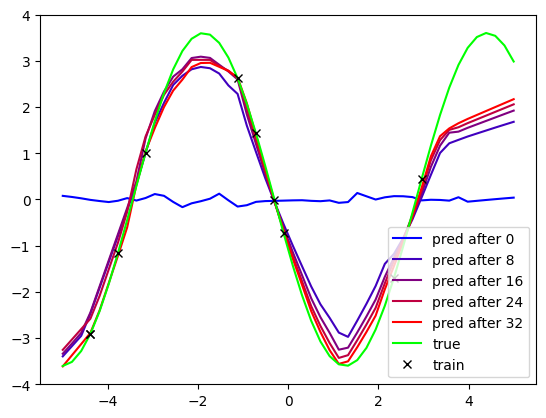

-----------------------------
iteration               20000
loss on plotted curve   0.367


In [21]:
# reptile

for iteration in range(niterations):

    # begin reptile
    weights_before = mlp.get_weights()

    # generate task
    f = gen_task()
    y_all = f(x_all)

    inds = rng.permutation(len(x_all))

    # for some k number of iterations perform optimization on the task
    for k in range(innerepochs):

        for start in range(0, len(x_all), ntrain):
            mbinds = inds[start:start+ntrain]
            train_on_batch(x_all[mbinds], y_all[mbinds], mlp, optimizer)

    weights_after = mlp.get_weights()

    outerstepsize = outerstepsize0 * (1 - iteration / niterations) # linear schedule

    mlp.set_weights([ weights_before[i] + (weights_after[i] - weights_before[i]) * outerstepsize
        for i in range(len(mlp.weights))])

    # begin evaluation
    if plot and iteration==0 or (iteration+1) % 1000 == 0:
        plt.cla()
        f = f_plot

        weights_before = mlp.get_weights()

        plt.plot(x_all, predict(x_all, mlp), label="pred after 0", color=(0,0,1))

        for inneriter in range(32):

            train_on_batch(xtrain_plot, f(xtrain_plot), mlp, optimizer)

            if (inneriter+1) % 8 == 0:
                frac = (inneriter+1) / 32
                plt.plot(x_all, predict(x_all, mlp), label="pred after %i"%(inneriter+1), color=(frac, 0, 1-frac))

        plt.plot(x_all, f(x_all), label="true", color=(0,1,0))
        lossval = np.square(predict(x_all, mlp) - f(x_all)).mean()
        plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
        plt.ylim(-4,4)
        plt.legend(loc="lower right")
        plt.pause(0.01)

        mlp.set_weights(weights_before)

        print("-----------------------------")
        print("iteration               {}".format(iteration+1))
        print("loss on plotted curve   {:.3f}".format(lossval))

# **MAML**

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.hidden1 = tf.keras.layers.Dense(num_hidden)
        self.hidden2 = tf.keras.layers.Dense(num_hidden)
        self.out = tf.keras.layers.Dense(num_classes)

    def forward(self, x):
        x = tf.keras.activations.relu(self.hidden1(x))
        x = tf.keras.activations.relu(self.hidden2(x))
        x = self.out(x)
        return x

model = Model()
mse_loss_fn = tf.keras.losses.MeanSquaredError()

In [ ]:
def copy_model(model, x):
    '''Copy model weights to a new model.

    Args:
        model: model to be copied.
        x: An input example. This is used to run
            a forward pass in order to add the weights of the graph
            as variables.
    Returns:
        A copy of the model.
    '''
    copied_model = Model()

    # If we don't run this step the weights are not "initialized"
    # and the gradients will not be computed.
    copied_model.forward(tf.convert_to_tensor(x))

    copied_model.set_weights(model.get_weights())
    return copied_model

def compute_loss(model, x, y, loss_fn=mse_loss_fn):
    logits = model.forward(x)
    mse = loss_fn(y, logits)
    return mse, logits

def train_on_batch(x, y, model):
    x = to_tensor(x)
    y = to_tensor(y)

    with tf.GradientTape() as tape:
        YHat = model.forward(x)
        loss = mse_loss_fn(y, YHat)
        grads = tape.gradient(loss, model.trainable_weights)
    tf.keras.optimizers.SGD().apply_gradients(zip(grads, model.trainable_weights))
    return loss

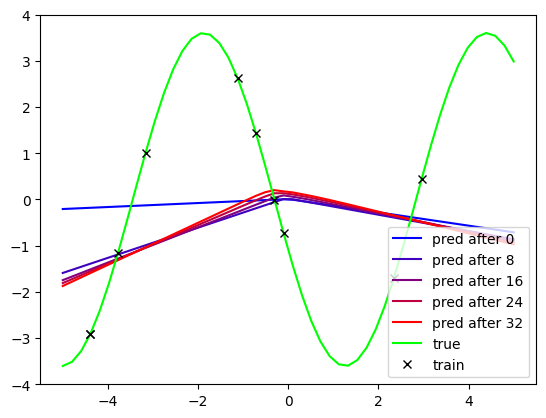

-----------------------------
iteration               1
loss on plotted curve   6.774


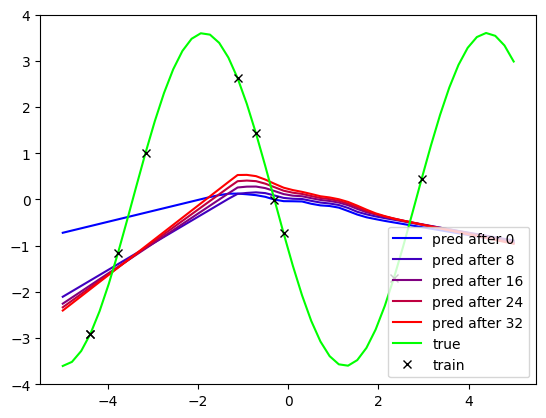

-----------------------------
iteration               1000
loss on plotted curve   6.774
Step 1000: loss = 3.125356435775757


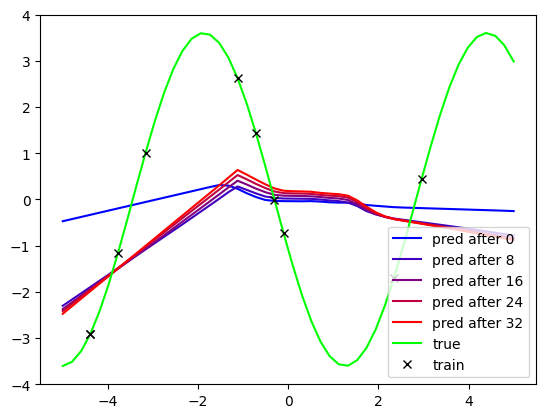

-----------------------------
iteration               2000
loss on plotted curve   6.774
Step 2000: loss = 3.0648388862609863


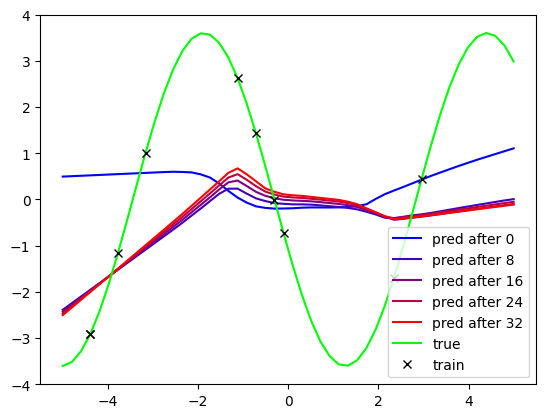

-----------------------------
iteration               3000
loss on plotted curve   6.774
Step 3000: loss = 3.0101804733276367


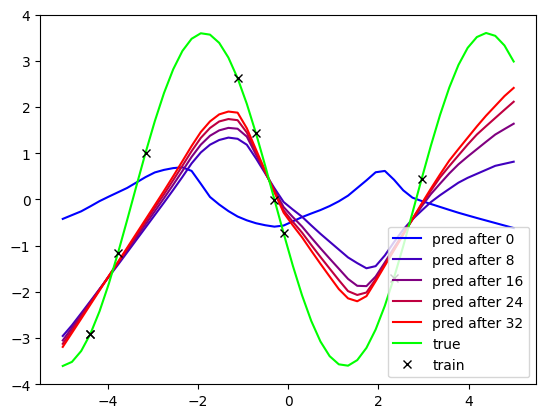

-----------------------------
iteration               4000
loss on plotted curve   6.774
Step 4000: loss = 2.851184844970703


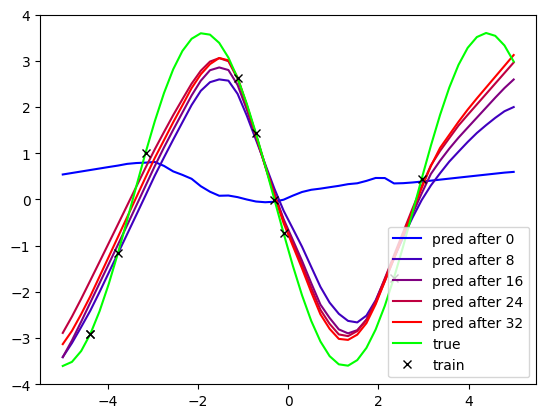

-----------------------------
iteration               5000
loss on plotted curve   6.774
Step 5000: loss = 2.564340114593506


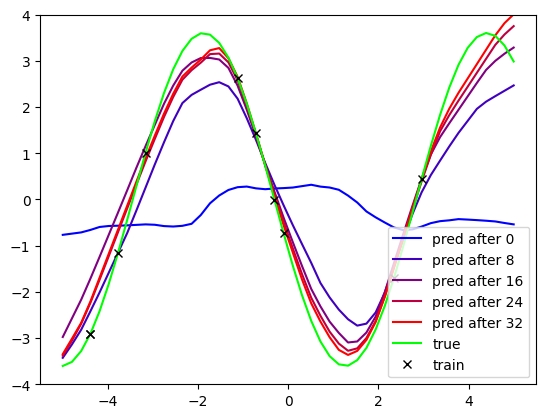

-----------------------------
iteration               6000
loss on plotted curve   6.774
Step 6000: loss = 2.34649920463562


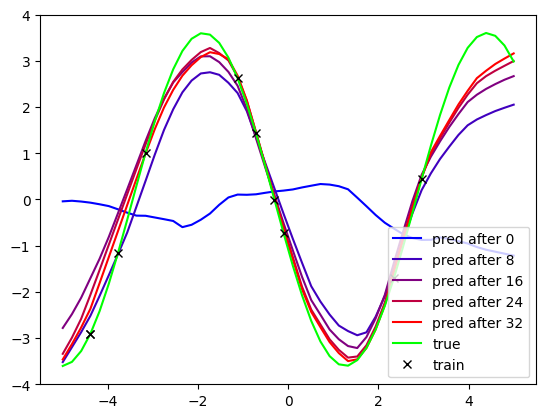

-----------------------------
iteration               7000
loss on plotted curve   6.774
Step 7000: loss = 2.1569552421569824


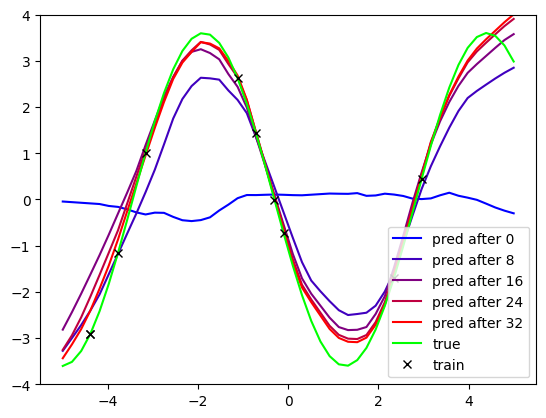

-----------------------------
iteration               8000
loss on plotted curve   6.774
Step 8000: loss = 1.9986716508865356


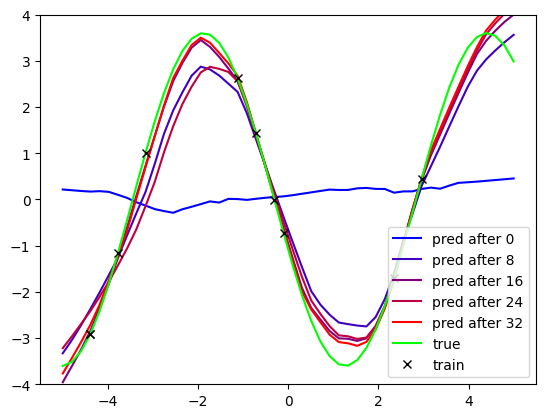

-----------------------------
iteration               9000
loss on plotted curve   6.774
Step 9000: loss = 1.8694446086883545


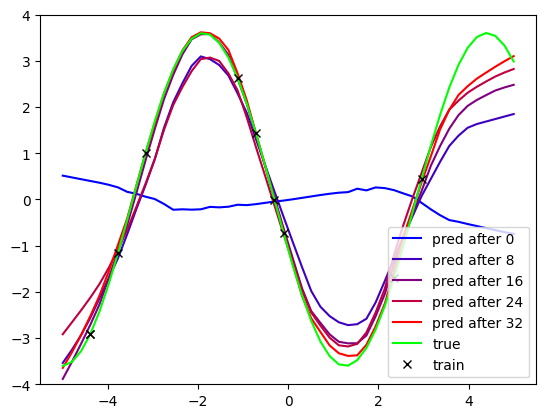

-----------------------------
iteration               10000
loss on plotted curve   6.774
Step 10000: loss = 1.7570940256118774


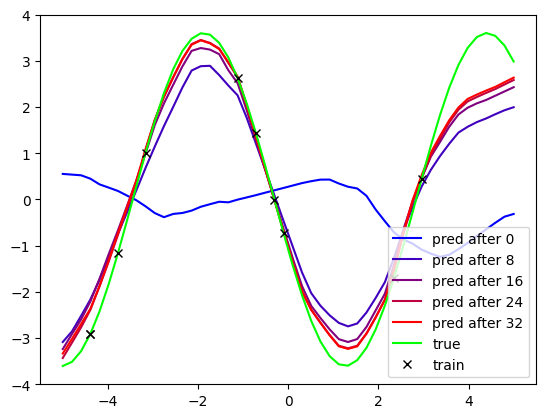

-----------------------------
iteration               11000
loss on plotted curve   6.774
Step 11000: loss = 1.6604007482528687


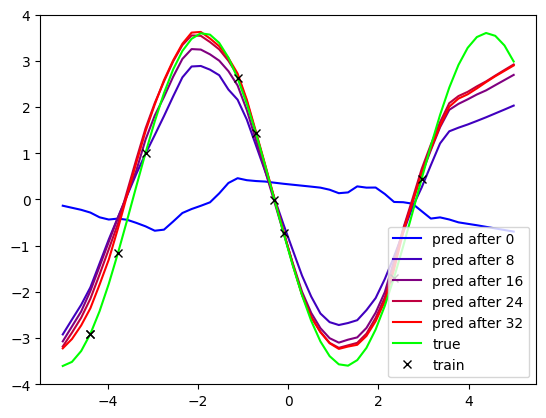

-----------------------------
iteration               12000
loss on plotted curve   6.774
Step 12000: loss = 1.5781561136245728


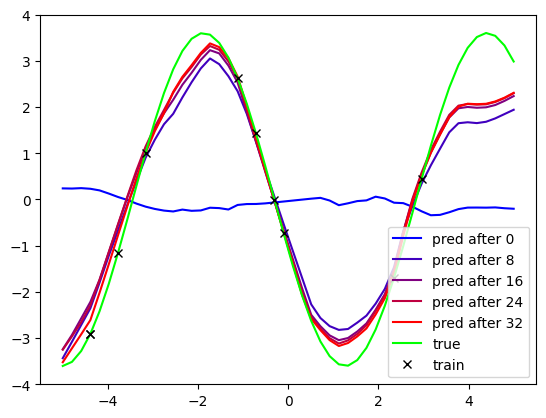

-----------------------------
iteration               13000
loss on plotted curve   6.774
Step 13000: loss = 1.5053964853286743


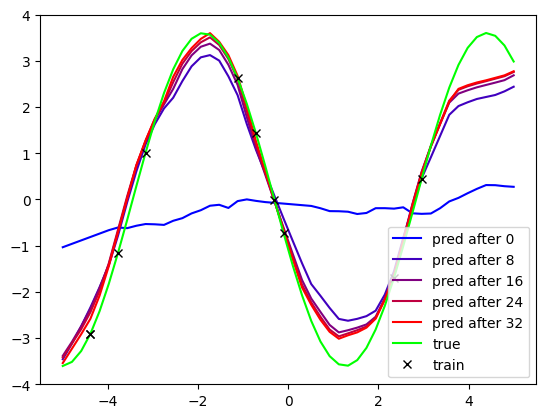

-----------------------------
iteration               14000
loss on plotted curve   6.774
Step 14000: loss = 1.4440327882766724


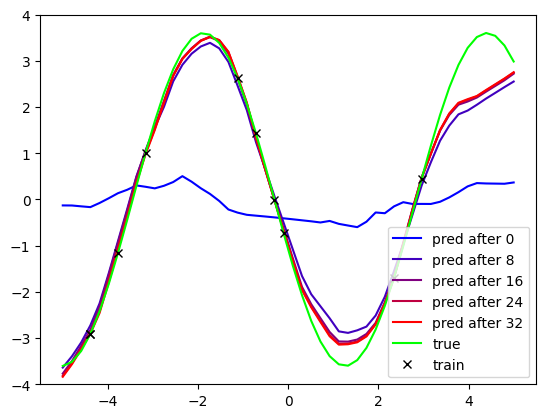

-----------------------------
iteration               15000
loss on plotted curve   6.774
Step 15000: loss = 1.3895037174224854


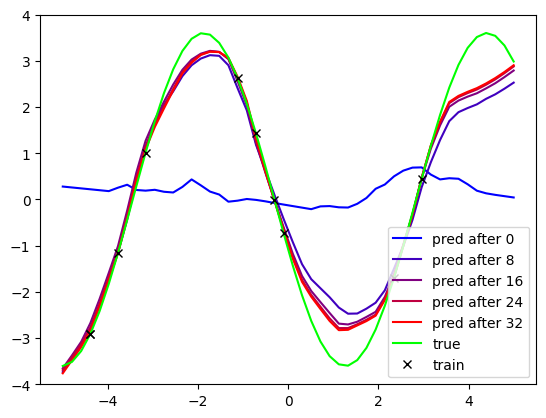

-----------------------------
iteration               16000
loss on plotted curve   6.774
Step 16000: loss = 1.3399289846420288


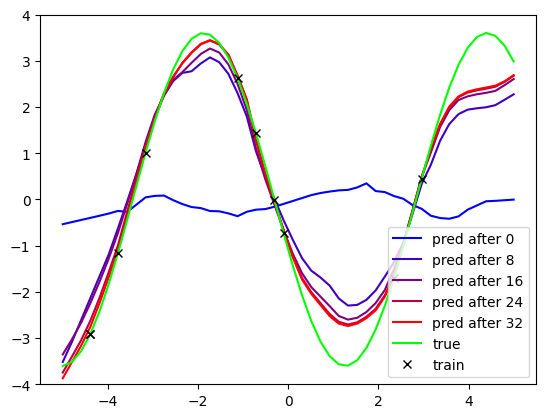

-----------------------------
iteration               17000
loss on plotted curve   6.774
Step 17000: loss = 1.2955071926116943


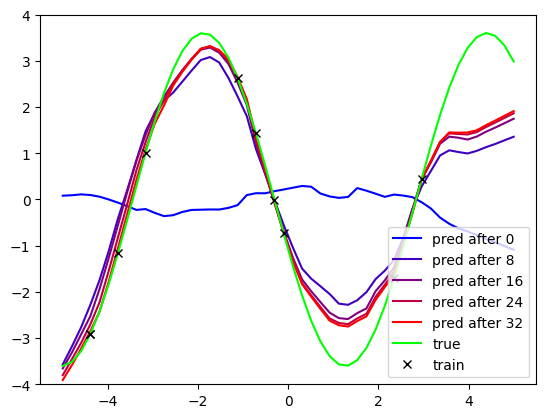

-----------------------------
iteration               18000
loss on plotted curve   6.774
Step 18000: loss = 1.2527565956115723


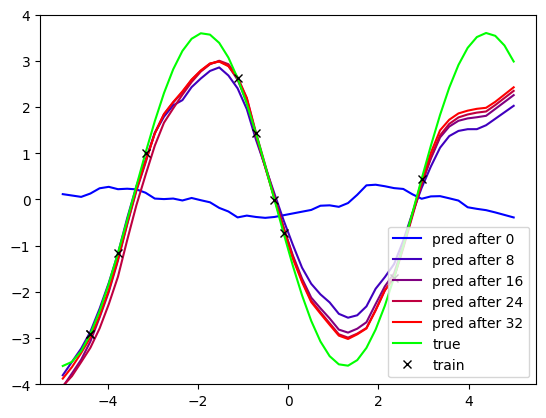

-----------------------------
iteration               19000
loss on plotted curve   6.774
Step 19000: loss = 1.2145090103149414


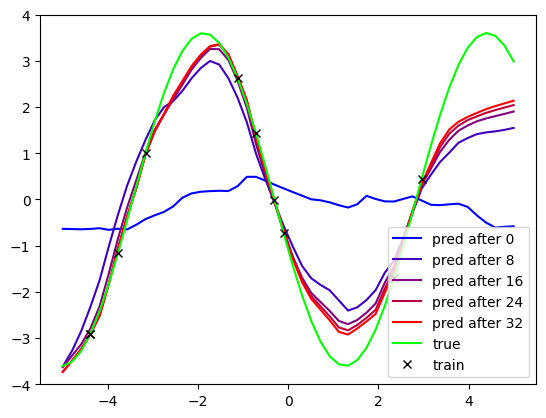

-----------------------------
iteration               20000
loss on plotted curve   6.774


In [ ]:
# maml
innerstepsize = 0.01

for _ in range(epochs):

    optimizer = tf.keras.optimizers.Adam()

    total_loss = 0
    losses = []
    for iteration in range(niterations):
        # generate task
        f = gen_task()
        x = np.random.uniform(-5, 5, ntrain)[:, None]
        y = f(x)

        x = to_tensor(x)
        y = to_tensor(y)
        model.forward(x)  # run forward pass to initialize weights
        with tf.GradientTape() as test_tape:
            # test_tape.watch(model.trainable_variables)
            # Step 5
            with tf.GradientTape() as train_tape:
                train_loss, _ = compute_loss(model, x, y)
            # Step 6
            gradients = train_tape.gradient(train_loss, model.trainable_variables)
            k = 0
            model_copy = copy_model(model, x)
            for j in range(len(model_copy.layers)):
                model_copy.layers[j].kernel = tf.subtract(model.layers[j].kernel,
                            tf.multiply(innerstepsize, gradients[k]))
                model_copy.layers[j].bias = tf.subtract(model.layers[j].bias,
                            tf.multiply(innerstepsize, gradients[k+1]))
                k += 2
            # Step 8
            test_loss, logits = compute_loss(model_copy, x, y)
        # Step 8
        gradients = test_tape.gradient(test_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Logs
        total_loss += test_loss
        loss = total_loss / (iteration+1.0)
        losses.append(loss)

        if iteration % 1000 == 0 and iteration > 0:
            print('Step {}: loss = {}'.format(iteration, loss))

        # begin evaluation
        if plot and iteration==0 or (iteration+1) % 1000 == 0:
            plt.cla()
            f = f_plot

            weights_before = model.get_weights()

            plt.plot(x_all, model.forward(x_all), label="pred after 0", color=(0,0,1))

            for inneriter in range(32):

                train_on_batch(xtrain_plot, f(xtrain_plot), model)

                if (inneriter+1) % 8 == 0:
                    frac = (inneriter+1) / 32
                    plt.plot(x_all, model.forward(x_all), label="pred after %i"%(inneriter+1), color=(frac, 0, 1-frac))

            plt.plot(x_all, f(x_all), label="true", color=(0,1,0))
            lossval = np.square(predict(x_all, mlp) - f(x_all)).mean()
            plt.plot(xtrain_plot, f(xtrain_plot), "x", label="train", color="k")
            plt.ylim(-4,4)
            plt.legend(loc="lower right")
            plt.pause(0.01)

            model.set_weights(weights_before)

            print("-----------------------------")
            print("iteration               {}".format(iteration+1))
            print("loss on plotted curve   {:.3f}".format(lossval))